# Patients treated in Emergency according to Age and Sex - HNAL

Analyzed by: [Samuel D. Boadi](https://bit.ly/Tableau_SDBoadi)

This dataset records patients who entered the emergency service between February and March 2023 and were referred to various clinics. The data includes information about the patient's admission, discharge, treatment establishment, cut-off date, sex, age, and geographic location. The dataset is located in the Department of Lima, Province of Lima, District of Lima with Ubigeo 150101. The data aims to improve transparency and openness of data for the Arzobispo Loayza National Hospital.

#### Dataset Info
<table>
    <tr>
        <th>Field</th>
        <th>Value</th>
    </tr>
    <tr>
        <td>Publisher</td>
        <td><a href="https://www.datosabiertos.gob.pe/group/hospital-nacional-arzobispo-loayza">Archbishop Loayza National Hospital</a></td>
    </tr>
    <tr>
        <td>Modified date</td>
        <td>2023-08-17</td>
    </tr>
    <tr>
        <td>Release date</td>
        <td>2023-06-26</td>
    </tr>
    <tr>
        <td>Public Access Level</td>
        <td>public</td>
    </tr>
</table>

Here is the link to the dataset, [website](https://www.datosabiertos.gob.pe/dataset/pacientes-atendidos-en-emergencia-seg%C3%BAn-la-edad-y-el-sexo-hnal). 

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from deep_translator import GoogleTranslator
from wordcloud import WordCloud

%matplotlib inline

### Gathering Data

In [2]:
# Load data and print out first 5 rows. 
df = pd.read_csv('data/patient_data_es.csv')
df.head()

,FECHA_CORTE,FECHA_INGRESO,FECHA_EGRESO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,SEXO,EDAD,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,SERVICIO_INGRESO
0,20230621,15/02/2023,7/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,FEMENINO,34,LIMA,LIMA,SAN JUAN DE LURIGANCHO,TOPICO DE MEDICINA
1,20230621,21/02/2023,1/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,89,LIMA,LIMA,LIMA,TOPICO DE MEDICINA
2,20230621,23/02/2023,3/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,37,LIMA,LIMA,LURIGANCHO,TOPICO DE MEDICINA
3,20230621,24/02/2023,1/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,LIMA,INDEPENDENCIA,TOPICO DE CIRUGIA
4,20230621,24/02/2023,2/03/2023,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MASCULINO,29,LIMA,CAJATAMBO,COPA,TOPICO DE MEDICINA


### Assessing Data

In [3]:
# Print the number of samples and columns in the dataset
print('The number of samples is', df.shape[0], 
     '\nand the number of columns is', df.shape[1])

The number of samples is 8407 
and the number of columns is 14


In [4]:
# Function to check null values in the selected columns
def check_null_values(data=df, col=False):
    '''
    Function to check whether a dataset has a null values 
    and the number of null values if they exist.

    Parameter: data - dataset to check
               col  - selected columns to check null the values

    '''
    if col == False:
        num = data.isnull().sum()
        ans = data.isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in the dataset')
    else:
        num = data[col].isnull().sum()
        ans = data[col].isnull().sum().any()
        if ans == True:
            print('Yes, there are null values in the dataset\n', num, 'null values')
        else:
            print('No, there are no null values in selected columns in the dataset')

In [5]:
check_null_values(df)

No, there are no null values in the dataset


In [6]:
# Check for duplicates in the dataset.
print('The number of duplicate rows in the dataset is', df.duplicated().sum())

The number of duplicate rows in the dataset is 0


In [7]:
# Inspect data types
df.dtypes

FECHA_CORTE               int64
FECHA_INGRESO            object
FECHA_EGRESO             object
ESTABLECIMIENTO          object
DEPARTAMENTO             object
PROVINCIA                object
DISTRITO                 object
UBIGEO                    int64
SEXO                     object
EDAD                      int64
DEPARTAMENTO_PACIENTE    object
PROVINCIA_PACIENTE       object
DISTRITO_PACIENTE        object
SERVICIO_INGRESO         object
dtype: object

### Cleaning Data
The dataset is clean.<br> 
Three changes will be made in the dataset:
* Remove the underscore in the columns and replace it with a space.
* Change datatype of _ADMISSION DATE_ & _DISCHARGE DATE_ to date
* Translate all column names and values in two columns (_SEX_ & _INCOME SERVICE_).

In [8]:
# replace underscore with space in the column heading 
df.columns = df.columns.str.replace('_', ' ')

In [9]:
# translate column heading from Spanish to English
columns = df.columns.values
n = 0
for column in columns:
    df.columns.values[n] = GoogleTranslator(source='es', target='en').translate(column)
    n += 1   

In [10]:
# change to datetime
df['ADMISSION DATE'] = pd.to_datetime(df['ADMISSION DATE'], format='%d/%m/%Y')
df['DISCHARGE DATE'] = pd.to_datetime(df['DISCHARGE DATE'], format='%d/%m/%Y')

# create two columns
df['ADMISSION DAY'] = df['ADMISSION DATE'].dt.day_name()
df['DISCHARGE DAY'] = df['DISCHARGE DATE'].dt.day_name()

In [11]:
def to_english(col, data=df):
    '''
    Function to translate values in a column to English

    Parameter: col  - selected columns to translate
               data - dataset 
    '''
    # Unique values in the column
    col_values = data[col].unique()
    n = col_values.shape[0]

    i = 0
    col_values_en = []
    for i in range(n):
        # translate to english
        col_values_en.append(GoogleTranslator(source='es', target='en').translate(col_values[i]))
        i += 1
    
    # create a dictionary of spanish : english
    es_en_dict = dict(map(lambda i,j : (i,j) , col_values, col_values_en))
    
    # replace spanish values with english in the column
    data[col].replace(to_replace=es_en_dict, inplace=True)

In [12]:
# translate values in column 'SEX' & 'INCOME SERVICE' 
#   from Spanish to English

to_english('SEX')
to_english('INCOME SERVICE')

In [13]:
df.head()

,CUT OFF DATE,ADMISSION DATE,DISCHARGE DATE,ESTABLISHMENT,DEPARTMENT,PROVINCE,DISTRICT,UBIGEO,SEX,AGE,PATIENT DEPARTMENT,PATIENT PROVINCE,PATIENT DISTRICT,INCOME SERVICE,ADMISSION DAY,DISCHARGE DAY
0,20230621,2023-02-15,2023-03-07,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,FEMALE,34,LIMA,LIMA,SAN JUAN DE LURIGANCHO,TOPIC OF MEDICINE,Wednesday,Tuesday
1,20230621,2023-02-21,2023-03-01,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MALE,89,LIMA,LIMA,LIMA,TOPIC OF MEDICINE,Tuesday,Wednesday
2,20230621,2023-02-23,2023-03-03,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MALE,37,LIMA,LIMA,LURIGANCHO,TOPIC OF MEDICINE,Thursday,Friday
3,20230621,2023-02-24,2023-03-01,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MALE,29,LIMA,LIMA,INDEPENDENCIA,TOPIC OF SURGERY,Friday,Wednesday
4,20230621,2023-02-24,2023-03-02,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,MALE,29,LIMA,CAJATAMBO,COPA,TOPIC OF MEDICINE,Friday,Thursday


### Visualize Data

In [14]:
df['AGE'].describe()

count    8407.000000
mean       40.659688
std        22.980185
min         1.000000
25%        23.000000
50%        39.000000
75%        58.500000
max       103.000000
Name: AGE, dtype: float64

In [15]:
female_df = df[df['SEX'] == 'FEMALE']
male_df = df[df['SEX'] == 'MALE']

In [16]:
def hist_plot(data=df, sex=''):
    bins = np.arange(0, data['AGE'].max()+2, 2)
    plt.hist(data = data, x = 'AGE', bins=bins)
    plt.xlabel('Age')
    plt.ylabel('No. of patients')
    plt.title('{} Age Distribution'.format(sex))
    if sex != '':
        plt.ylim((0, 220))

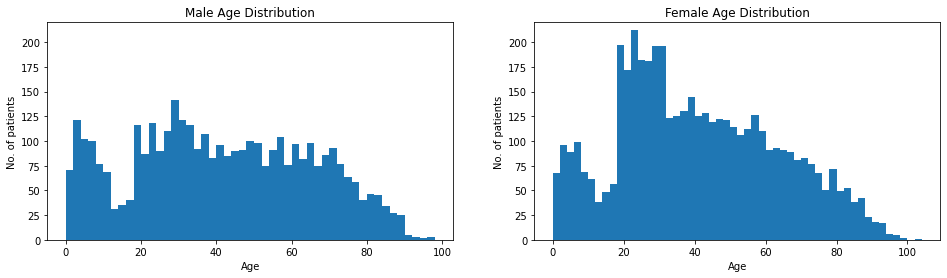

In [17]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
hist_plot(male_df, 'Male')

plt.subplot(1, 2, 2)
hist_plot(female_df, 'Female')
         
plt.subplots_adjust(wspace=0.2, hspace=1)

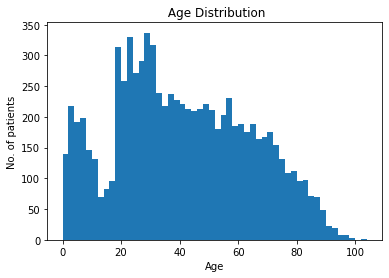

In [18]:
hist_plot(df)

The youngest patient was 1 year old and the oldest was 103.<br> 
The average age of patients admitted to the hospital was 40.<br>

Patients between 1 and 10 years old visited the hospital similar to the 40 years old patients.<br>
There was a drop in admissions between 10 and 20 years old.<br> 
Patients aged 20 to 30 had the highest number of admissions, especially females.<br> 
This was clear in the female age distribution but less clear in the male age distribution.<br>

Admissions for patients over 30 declined steadily.<br> 
There was a sharp decline for females, but the male age distribution showed a decline with some spikes along the way.

Female 4714 
Male 3693


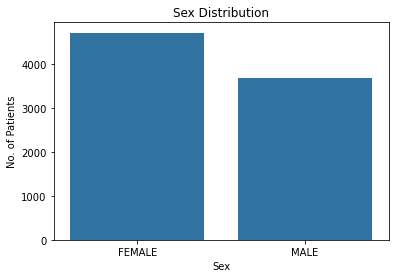

In [19]:
blue_color = sb.color_palette()[0]
col_order = df['SEX'].value_counts().index
sb.countplot(data=df, x='SEX', color=blue_color, order=col_order)
plt.title('Sex Distribution')
plt.ylabel('No. of Patients')
plt.xlabel('Sex');

print('Female {} \nMale {}' .format(df['SEX'].value_counts()[0], df['SEX'].value_counts()[1]))

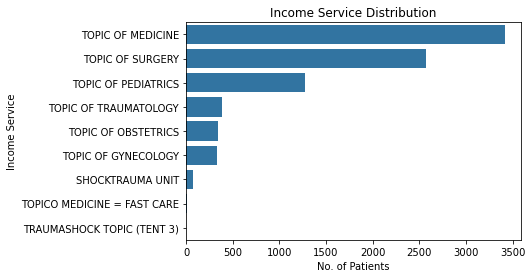

In [20]:
col_order = df['INCOME SERVICE'].value_counts().index
sb.countplot(data=df, y='INCOME SERVICE', color=blue_color, order=col_order)
plt.title('Income Service Distribution')
plt.xlabel('No. of Patients')
plt.ylabel('Income Service');

Females outnumbered males in the hospital 1021 to 1.<br> 
This is because 99% of patients seeking Obstetrics and Gynecology care were female.<br> 
There were also 400 more female than male patients in the Medicine department.<br> 
Further investigation is needed to determine the reason for this disparity.<br> 
The other Income Services had similar numbers of patients for both sexes.

Medicine was the topic with the most patient admissions, followed by Surgery.

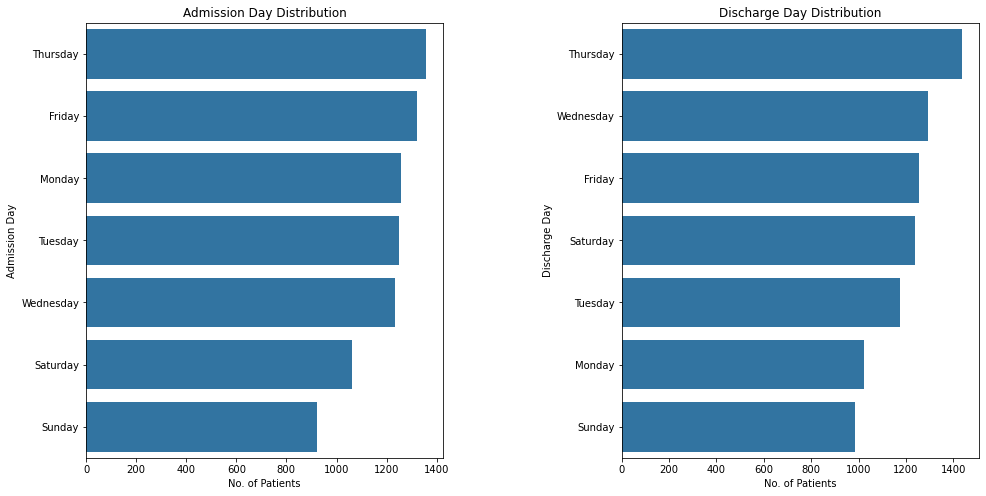

In [21]:
# columns to plot
cols = ['ADMISSION DAY', 'DISCHARGE DAY']

# plot bar(h) chart of columns in 'cols'
plt.figure(figsize=(16, 8))
a=0

for col in cols:
    a +=1
    plt.subplot(1, 2, a)
    col_order = df[col].value_counts().index
    sb.countplot(data=df, y=col, color=blue_color, order=col_order)
    plt.title('{} Distribution'.format(col.title()))
    plt.xlabel('No. of Patients')
    plt.ylabel(col.title());
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Thursdays had the highest number of both patient admissions and discharges, while Sundays had the lowest.<br> 
The other days of the week ranked differently for admissions and discharges.

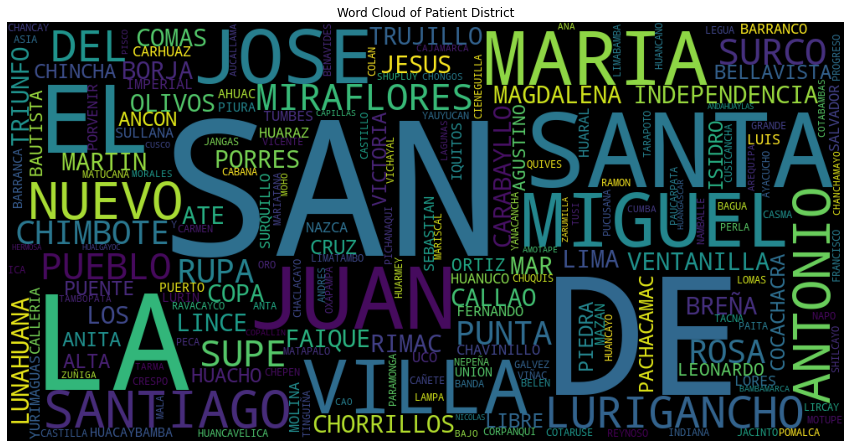

In [22]:
unique_string=(' ').join(df['PATIENT DISTRICT'].unique())
wordcloud = WordCloud(width=1000, height=500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.title('Word Cloud of Patient District')
plt.axis('off')
plt.imshow(wordcloud);

In [23]:
# save new datasets for next section
df.to_csv('data/patient_data_en.csv', index=False)